In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [39]:
data = pd.read_csv('data_populated_0_7999.csv')
data

,Unnamed: 0,address,link,long,lat,property_type,property_costs,total_area,number_of_units,year_built,parking_spots,volume_rate,green_rating,developer_company,property_management_company
0,0,汤臣一品,https://shanghai.anjuke.com/community/view/8,31.238608,121.508381,公寓,15.00元/平米/月,141894m²,220户,2006年,200,5.97,40%(高),汤臣海景花园（上海浦东新区）有限公司,晶华物业有限公司
1,1,中粮海景壹号,https://shanghai.anjuke.com/community/view/218807,31.236882,121.510280,公寓,12.00元/平米/月,116605m²,317户,2010年,200,4,51%(高),上海鹏利置业发展有限公司,上海高力国际物业服务有限公司
2,2,陆家嘴锦绣前城,https://shanghai.anjuke.com/community/view/725250,31.201611,121.542311,公寓,1.00元/平米/月,暂无数据,暂无数据,2016年,200,1.8,40%(高),上海陆家嘴（集团）有限公司,上海市陆家嘴物业管理有限公司
3,3,张江一村,https://shanghai.anjuke.com/community/view/13947,31.212369,121.619192,公寓,0.40元/平米/月,暂无数据,暂无数据,1995年,300个,1.8,32%(一般),暂无数据,暂无数据
4,4,长岛花苑,https://shanghai.anjuke.com/community/view/2679,31.270386,121.609057,公寓,1.00元/平米/月,23000m²,2034户,1993年,1000,1.2,35%(一般),上海浦东伟业房地产开发总公司,上海洋泾物业
5,5,陆家嘴国际华城,https://shanghai.anjuke.com/community/view/174,31.241847,121.542053,公寓,2.00元/平米/月,200000m²,1200户,2004年,900,2.2,60%(高),上海华能天地房地产有限公司,陆家嘴物业
6,6,上海绿城,https://shanghai.anjuke.com/community/view/130,31.209665,121.539480,公寓,2.55元/平米/月,暂无数据,暂无数据,2004年,120,2.2,50%(高),上海绿宇房地产开发有限公司,上海绿宇物业管理有限公司
7,7,仁恒河滨城(三期),https://shanghai.anjuke.com/community/view/818751,31.236467,121.572096,公寓,3.50元/平米/月,暂无数据,暂无数据,2009年,暂无数据,2.3,43%(高),上海仁恒房地产有限公司,仁恒物业
8,8,碧云国际社区晓园,https://shanghai.anjuke.com/community/view/100,31.247269,121.598271,公寓,3.90元/平米/月,50000m²,268户,2006年,380,1.6,49%(高),上海中通贵云实业有限公司,上海金晨物业管理有限公司
9,9,金谊河畔,https://shanghai.anjuke.com/community/view/13910,31.146520,121.522219,公寓,1.66元/平米/月,暂无数据,暂无数据,2009年,1395,1.89,45%(高),上海中房置业股份有限公司,上海中星集团申城物业有限公司


In [40]:
data.rename(columns = {"property_costs":"property_cost(Rmb/m^2/month)", "total_area":"total_area(m2)", "green_rating": "green_rating(%)"},inplace = True)

In [41]:
data = data.replace(u'暂无数据', np.nan).dropna()

In [42]:
data["property_type"] = data["property_type"].map({"公寓":0,"别墅":1})
data["property_type"] = data["property_type"].fillna(0)

In [43]:
data["property_cost(Rmb/m^2/month)"] = data["property_cost(Rmb/m^2/month)"].str.replace(r'[^\d\.]+','')

In [44]:
data["number_of_units"] = data["number_of_units"].str.replace(r'[^\d]+','')
data["year_built"] = data["year_built"].str.replace(r'[^\d]+','')
data["parking_spots"] = data["parking_spots"].str.replace(r'[^\d]+','')
data["volume_rate"] = data["volume_rate"].str.replace(r'[^\d]+','')
data["green_rating(%)"] = data["green_rating(%)"].str.replace(r'[^\d]+','')
data["total_area(m2)"] = data["total_area(m2)"].str.replace(r'[^\d]+','')

In [45]:
data.head()

,Unnamed: 0,address,link,long,lat,property_type,property_cost(Rmb/m^2/month),total_area(m2),number_of_units,year_built,parking_spots,volume_rate,green_rating(%),developer_company,property_management_company
0,0,汤臣一品,https://shanghai.anjuke.com/community/view/8,31.238608,121.508381,0.0,15.00,141894,220,2006,200,597,40,汤臣海景花园（上海浦东新区）有限公司,晶华物业有限公司
1,1,中粮海景壹号,https://shanghai.anjuke.com/community/view/218807,31.236882,121.510280,0.0,12.00,116605,317,2010,200,4,51,上海鹏利置业发展有限公司,上海高力国际物业服务有限公司
4,4,长岛花苑,https://shanghai.anjuke.com/community/view/2679,31.270386,121.609057,0.0,1.00,23000,2034,1993,1000,12,35,上海浦东伟业房地产开发总公司,上海洋泾物业
5,5,陆家嘴国际华城,https://shanghai.anjuke.com/community/view/174,31.241847,121.542053,0.0,2.00,200000,1200,2004,900,22,60,上海华能天地房地产有限公司,陆家嘴物业
8,8,碧云国际社区晓园,https://shanghai.anjuke.com/community/view/100,31.247269,121.598271,0.0,3.90,50000,268,2006,380,16,49,上海中通贵云实业有限公司,上海金晨物业管理有限公司


In [46]:
price = pd.read_csv("data_prices_4000-8000.csv")
price[60*36:-72]

,Unnamed: 0,index,name,date,price
2160,2160,4000,上良小区,201504,7458
2161,2161,4000,上良小区,201505,11471
2162,2162,4000,上良小区,201506,10343
2163,2163,4000,上良小区,201507,9041
2164,2164,4000,上良小区,201508,10812
2165,2165,4000,上良小区,201509,16511
2166,2166,4000,上良小区,201510,16818
2167,2167,4000,上良小区,201511,16844
2168,2168,4000,上良小区,201512,15279
2169,2169,4000,上良小区,201601,15738


In [47]:
wide = price[60*36:-72].pivot_table(index = 'name', columns = 'date', values = 'price')
wide

date,201504,201505,201506,201507,201508,201509,201510,201511,201512,201601,...,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803
name,,,,,,,,,,,,,,,,,,,,,
一品漫城(一期别墅),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60624.0,63196.0,64319.00,62585.00,55509.00,61454.00,60467.00,59485.0,64473.0,71673.0
一品漫城(三期别墅),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55975.0,63317.0,60962.00,55708.00,52782.00,54272.00,59635.00,58931.0,58171.0,66805.0
一城花苑,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4528.0,4522.0,4276.00,4283.00,29958.00,37500.00,37500.00,37500.0,37500.0,37500.0
丁家弄小区,56627.0,59461.0,59849.0,60081.0,60100.0,61208.0,69856.0,70208.0,71054.0,72380.0,...,100386.0,98833.0,104853.00,110197.00,129072.00,127952.00,117948.00,115775.0,103933.0,103938.0
丁香花园,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23633.0,23556.0,28309.00,25074.00,103258.00,126049.00,126045.00,126030.0,126025.0,126022.0
万业梦立方,22289.0,22823.0,23096.0,23425.0,23869.0,23814.0,24011.0,24455.0,24599.0,24829.0,...,36211.0,36216.0,36216.00,36564.00,35093.00,33368.00,34439.00,36577.0,37618.0,37125.0
万业紫辰苑B区,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,41716.00,42822.0,40549.0,42759.0
万业紫辰苑二期,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,43683.00,41850.0,40220.0,39929.0
万临家园,28479.0,28531.0,29699.0,30953.0,30788.0,30291.0,31290.0,32448.0,34398.0,34668.0,...,55019.0,54518.0,52550.00,51452.00,54173.00,54363.00,52459.00,53203.0,51271.0,53776.0


In [48]:
data.index

Int64Index([   0,    1,    4,    5,    8,   13,   17,   20,   23,   25,
            ...
            7782, 7783, 7784, 7785, 7974, 7975, 7982, 7987, 7996, 7999],
           dtype='int64', length=2721)

In [49]:
data_with_price = data.merge(wide, how = 'inner', left_on = 'address', right_index = True)
data_with_price.head().T

,1553,3742,4002,4003,4004
Unnamed: 0,1553,3742,4001,4002,4003
address,中汇花园,牡丹新村,鸿福新村,豪嘉府邸,秀枫翠谷
link,https://shanghai.anjuke.com/community/view/82251,https://shanghai.anjuke.com/community/view/16911,https://shanghai.anjuke.com/community/view/7059,https://shanghai.anjuke.com/community/view/6991,https://shanghai.anjuke.com/community/view/6945
long,31.0448,31.1597,31.1304,31.1863,31.1646
lat,121.75,121.355,121.425,121.395,121.371
property_type,0,0,0,1,0
property_cost(Rmb/m^2/month),0.80,0.50,0.40,5.00,0.60
total_area(m2),6136,50000,4500,6541,150000
number_of_units,300,231,816,16,800
year_built,2007,1996,1994,1998,1996


In [50]:
data_with_price

,Unnamed: 0,address,link,long,lat,property_type,property_cost(Rmb/m^2/month),total_area(m2),number_of_units,year_built,...,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803
1553,1553,中汇花园,https://shanghai.anjuke.com/community/view/82251,31.044786,121.749938,0.0,0.80,6136,300,2007,...,109345.000000,107384.000000,106669.0,106731.000000,105716.000000,105031.0,106344.000000,107713.000000,110361.000000,109613.000000
3742,3742,牡丹新村,https://shanghai.anjuke.com/community/view/16911,31.159725,121.354591,0.0,0.50,50000,231,1996,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,12186.000000,12263.000000,15875.000000,18490.000000
4002,4001,鸿福新村,https://shanghai.anjuke.com/community/view/7059,31.130442,121.425372,0.0,0.40,4500,816,1994,...,52496.000000,52443.000000,49889.0,49527.000000,48691.000000,51218.0,50234.000000,48544.000000,46611.000000,48128.000000
4003,4002,豪嘉府邸,https://shanghai.anjuke.com/community/view/6991,31.186257,121.394641,1.0,5.00,6541,16,1998,...,114027.000000,114898.000000,114637.0,114637.000000,114690.000000,119609.0,130802.000000,143431.000000,163775.000000,165441.000000
4004,4003,秀枫翠谷,https://shanghai.anjuke.com/community/view/6945,31.164590,121.371177,0.0,0.60,150000,800,1996,...,53609.000000,54116.000000,53364.0,53116.000000,53059.000000,52476.0,53843.000000,57096.000000,56189.000000,57393.000000
4005,4004,沪江新苑,https://shanghai.anjuke.com/community/view/6919,31.182321,121.354818,0.0,0.50,36000,868,2000,...,49636.000000,46007.000000,44621.0,44068.000000,42941.000000,40564.0,40879.000000,40959.000000,40933.000000,40962.000000
4007,4006,苹果园(公寓),https://shanghai.anjuke.com/community/view/6886,31.180182,121.397327,0.0,1.00,70000,630,1998,...,63315.000000,63191.000000,58261.0,67255.000000,62875.000000,61564.0,59684.000000,57569.000000,60272.000000,71987.000000
4008,4007,旅专小区,https://shanghai.anjuke.com/community/view/6878,31.185839,121.403435,0.0,0.80,3500,420,1998,...,57494.000000,57514.000000,56065.0,57500.000000,56168.000000,55540.0,54495.000000,60110.000000,51525.000000,50325.000000
4009,4008,水清二村,https://shanghai.anjuke.com/community/view/6791,31.122051,121.388575,0.0,1.20,100000,1300,1997,...,57853.000000,55018.000000,54641.0,52648.000000,52592.000000,51775.0,48648.000000,48761.000000,49451.000000,49627.000000
4011,4010,虹梅佳苑,https://shanghai.anjuke.com/community/view/6391,31.127679,121.425421,0.0,0.70,35000,381,2004,...,55534.000000,52977.000000,52997.0,53201.000000,56486.000000,53379.0,51296.000000,52509.000000,50900.000000,50867.000000


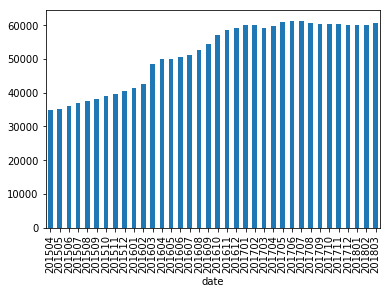

In [21]:
price_mean = price[60*36:-72].copy()
price_mean['price'] = price_mean['price'].replace(0.0, np.nan)
price_mean.groupby('date').mean()['price'].plot.bar()
plt.show()

In [51]:
price_avg = price_mean.groupby('date').mean()['price']
price_std = price_mean.groupby('date').std()['price']

In [52]:
col = data_with_price.columns[15:]
data_ratio = data_with_price.copy()
for i in col:
    data_ratio[i] = (data_with_price[i]- price_avg[i])/price_avg[i]

In [59]:
data_ratio['ratio'] = (data_ratio[201801] + data_ratio[201802] + data_ratio[201803])/3
ratio = data_ratio[[data_ratio.columns[1]] + [i for i in data_ratio.columns[3:13]] + ['ratio']]
for i in ratio.columns[1:]:
    ratio.loc[:,i] = pd.to_numeric(ratio.loc[:,i])

/Users/rhett/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [60]:
ratio['parking_spots']

,address,long,lat,property_type,property_cost(Rmb/m^2/month),total_area(m2),number_of_units,year_built,parking_spots,volume_rate,green_rating(%),ratio
1553,中汇花园,31.044786,121.749938,0.0,0.800000,6136,300,2007,1.000000e+02,12,30,0.813762
3742,牡丹新村,31.159725,121.354591,0.0,0.500000,50000,231,1996,3.400000e+01,2,30,-0.742051
4002,鸿福新村,31.130442,121.425372,0.0,0.400000,4500,816,1994,1.500000e+02,13,35,-0.206919
4003,豪嘉府邸,31.186257,121.394641,1.0,5.000000,6541,16,1998,1.600000e+01,38,64,1.615737
4004,秀枫翠谷,31.164590,121.371177,0.0,0.600000,150000,800,1996,5.700000e+01,15,30,-0.055294
4005,沪江新苑,31.182321,121.354818,0.0,0.500000,36000,868,2000,1.200000e+02,12,35,-0.319988
4007,苹果园(公寓),31.180182,121.397327,0.0,1.000000,70000,630,1998,1.250000e+02,12,46,0.050332
4008,旅专小区,31.185839,121.403435,0.0,0.800000,3500,420,1998,5.000000e+01,11,20,-0.103338
4009,水清二村,31.122051,121.388575,0.0,1.200000,100000,1300,1997,1.100000e+03,18,30,-0.181710
4011,虹梅佳苑,31.127679,121.425421,0.0,0.700000,35000,381,2004,5.000000e+01,17,35,-0.146032


In [61]:
ratio['keep'] = ratio['ratio']
for idx, row in ratio.iterrows():
    ratio.loc[idx,'keep'] = (row['number_of_units'] < 10000) & (row['year_built']<10000) & (row['parking_spots']<1000) \
                  & (row['volume_rate'] < 1000) & (row['green_rating(%)'] <= 100)

/Users/rhett/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/rhett/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [62]:
ratio = ratio[ratio['keep']].drop('keep', axis = 1)
ratio

,address,long,lat,property_type,property_cost(Rmb/m^2/month),total_area(m2),number_of_units,year_built,parking_spots,volume_rate,green_rating(%),ratio
1553,中汇花园,31.044786,121.749938,0.0,0.80,6136,300,2007,100.0,12,30,0.813762
3742,牡丹新村,31.159725,121.354591,0.0,0.50,50000,231,1996,34.0,2,30,-0.742051
4002,鸿福新村,31.130442,121.425372,0.0,0.40,4500,816,1994,150.0,13,35,-0.206919
4003,豪嘉府邸,31.186257,121.394641,1.0,5.00,6541,16,1998,16.0,38,64,1.615737
4004,秀枫翠谷,31.164590,121.371177,0.0,0.60,150000,800,1996,57.0,15,30,-0.055294
4005,沪江新苑,31.182321,121.354818,0.0,0.50,36000,868,2000,120.0,12,35,-0.319988
4007,苹果园(公寓),31.180182,121.397327,0.0,1.00,70000,630,1998,125.0,12,46,0.050332
4008,旅专小区,31.185839,121.403435,0.0,0.80,3500,420,1998,50.0,11,20,-0.103338
4011,虹梅佳苑,31.127679,121.425421,0.0,0.70,35000,381,2004,50.0,17,35,-0.146032
4012,莲浦花苑,31.132375,121.401815,0.0,1.50,100000,888,1998,150.0,14,50,-0.184972


In [65]:
ratio['property_type'] = ratio['property_type'].astype('int64')
ratio['parking_spots'] = ratio['parking_spots'].astype('int64')
ratio

,address,long,lat,property_type,property_cost(Rmb/m^2/month),total_area(m2),number_of_units,year_built,parking_spots,volume_rate,green_rating(%),ratio
1553,中汇花园,31.044786,121.749938,0,0.80,6136,300,2007,100,12,30,0.813762
3742,牡丹新村,31.159725,121.354591,0,0.50,50000,231,1996,34,2,30,-0.742051
4002,鸿福新村,31.130442,121.425372,0,0.40,4500,816,1994,150,13,35,-0.206919
4003,豪嘉府邸,31.186257,121.394641,1,5.00,6541,16,1998,16,38,64,1.615737
4004,秀枫翠谷,31.164590,121.371177,0,0.60,150000,800,1996,57,15,30,-0.055294
4005,沪江新苑,31.182321,121.354818,0,0.50,36000,868,2000,120,12,35,-0.319988
4007,苹果园(公寓),31.180182,121.397327,0,1.00,70000,630,1998,125,12,46,0.050332
4008,旅专小区,31.185839,121.403435,0,0.80,3500,420,1998,50,11,20,-0.103338
4011,虹梅佳苑,31.127679,121.425421,0,0.70,35000,381,2004,50,17,35,-0.146032
4012,莲浦花苑,31.132375,121.401815,0,1.50,100000,888,1998,150,14,50,-0.184972


In [66]:
ratio.to_csv('data_with_ratio_4000-8000.csv')